In [93]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(88)

In [94]:
ret = pd.read_excel("Analysis_Data.xlsx", sheet_name="Drilling Cost", skiprows=2)
proj = pd.read_excel("Analysis_Data.xlsx", sheet_name="Price Projections", skiprows=2)

## Simulate Probablity of Wet Well & Hydrocarbons

c:\anaconda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


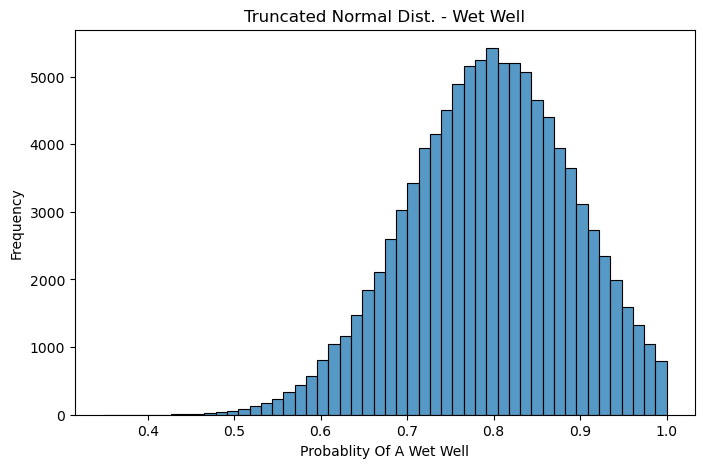

c:\anaconda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


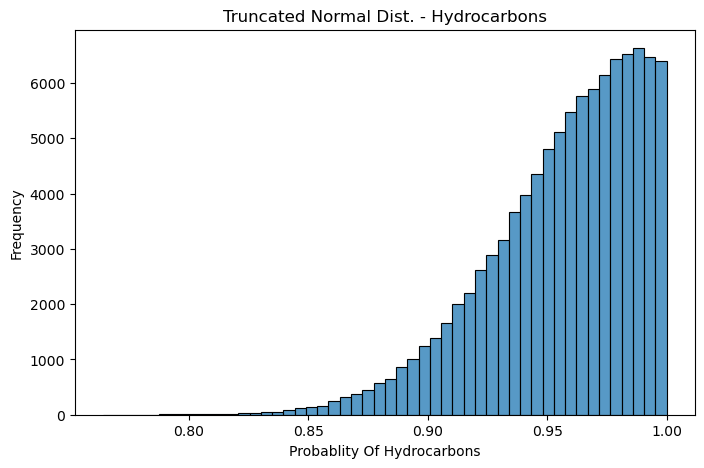

In [95]:
# P(wet) 
a, b = 0, 1  # Truncation limits (probabilities between 0 and 1)
mu, sigma = 0.80, 0.1  # Mean and standard deviation of the normal distribution
trunc_norm = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
p_wet = trunc_norm.rvs(size=100000)  # Sample a probability value 100000 times

# Plot P(wet)  out
plt.figure(figsize=(8, 5)) 
ax = sns.histplot(data=p_wet, bins=50)
ax.set_title("Truncated Normal Dist. - Wet Well")
ax.set_xlabel("Probablity Of A Wet Well")
ax.set_ylabel("Frequency")
plt.show()


# P(hydrocarbons) 
a, b = 0, 1  # Truncation limits (probabilities between 0 and 1)
mu, sigma = 0.99, 0.05  # Mean and standard deviation of the normal distribution
trunc_norm = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
p_hydro = trunc_norm.rvs(size=100000)  # Sample a probability value 100000 times

# Plot P(hydrocarbons) out
plt.figure(figsize=(8, 5)) 
ax = sns.histplot(data=p_hydro, bins=50)
ax.set_title("Truncated Normal Dist. - Hydrocarbons")
ax.set_xlabel("Probablity Of Hydrocarbons")
ax.set_ylabel("Frequency")
plt.show()

## Determine The Number of Drillable Wells

In [ ]:
# Simulate number of total wells
num_wells = np.random.uniform(low = 10, high = 30, size=100000).astype(int) # cast as int bc cant have half a well (always rounding down)

# Simulate how many of the total wells are wet
producing_wells = np.random.binomial(n=num_wells, p=p_wet)

# Simulate how many of the wet wells have hydrocarbons present
hydrocarbon_wells = np.random.binomial(n=producing_wells, p=p_hydro)


TypeError: Cannot cast array data from dtype('float64') to dtype('int32') according to the rule 'safe'

In [102]:
num_wells

array([21., 22., 28., ..., 13., 12., 18.])

c:\anaconda\envs\ds\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Count'>

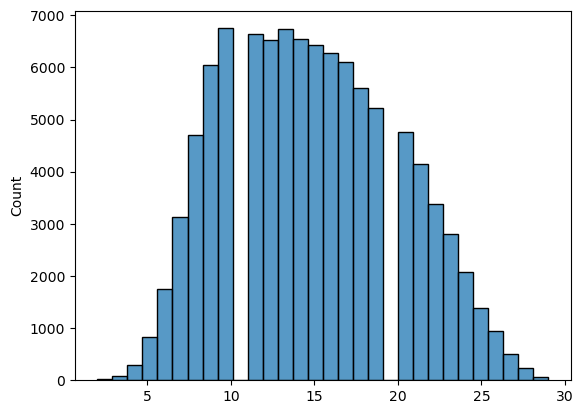

In [99]:
sns.histplot(hydrocarbon_wells, bins=30)